In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

from tensorflow import keras
tfds.disable_progress_bar()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


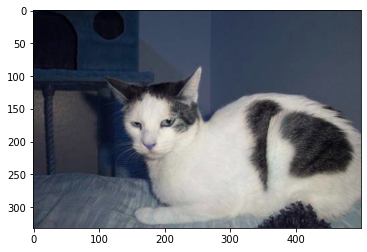

In [3]:
DATDIRTRAIN = '/content/drive/MyDrive/Deep Learning Johan/train'
DATDIRTEST = '/content/drive/MyDrive/Deep Learning Johan/test'
CATEGORIES = ['cat','dog','panda']
for category in CATEGORIES :
  path = os.path.join(DATDIRTRAIN, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break

In [4]:
print(img_array.shape)

(332, 500, 3)


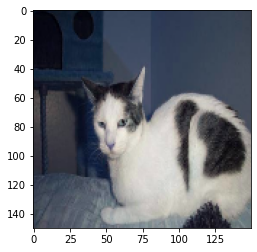

In [5]:
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

0 = cat

1 = dog

2 = panda

In [6]:
training_data = []

def create_training_data():
  for category in CATEGORIES :
    path = os.path.join(DATDIRTRAIN, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
  
create_training_data()

In [7]:
print(len(training_data))

2400


In [8]:
test_data = []

def create_test_data():
  for category in CATEGORIES :
    path = os.path.join(DATDIRTEST, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        test_data.append([new_array,class_num])
      except Exception as e:
        pass
  
create_test_data()

In [9]:
print(len(test_data))

600


In [10]:
import random

In [11]:
random.shuffle(training_data)
random.shuffle(test_data)

In [12]:
for i in training_data[:10]:
    print(i[1])

0
0
1
1
1
1
2
2
0
0


In [13]:
X_train=[]
y_train=[]

In [14]:
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1, IMG_SIZE,IMG_SIZE,3)
y_train = np.array(y_train)

In [15]:
X_test=[]
y_test=[]

In [16]:
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1, IMG_SIZE,IMG_SIZE,3)
y_test = np.array(y_test)

In [17]:
import pickle

In [18]:
pickle_out = open('X_train','wb')
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out = open('y_train','wb')
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [19]:
pickle_out = open('X_test','wb')
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out = open('y_test','wb')
pickle.dump(y_test,pickle_out)
pickle_out.close()

In [20]:
print(type(X_train[0]))

<class 'numpy.ndarray'>


In [21]:
print(type(y_train[0]))

<class 'numpy.int64'>


In [22]:
X_train = X_train/255.0
X_test = X_test/255.0

In [23]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
75/75 [==============================] - 4s 12ms/step - loss: 23.5917 - accuracy: 0.3813
Epoch 2/5
75/75 [==============================] - 1s 11ms/step - loss: 1.9777 - accuracy: 0.5447
Epoch 3/5
75/75 [==============================] - 1s 11ms/step - loss: 1.2570 - accuracy: 0.5303
Epoch 4/5
75/75 [==============================] - 1s 11ms/step - loss: 1.0302 - accuracy: 0.5637
Epoch 5/5
75/75 [==============================] - 1s 11ms/step - loss: 0.8476 - accuracy: 0.6137


In [24]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 5ms/step - loss: 1.0217 - accuracy: 0.5250


[1.0217264890670776, 0.5249999761581421]

In [25]:
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
75/75 [==============================] - 33s 36ms/step - loss: 2.8466 - accuracy: 0.4312
Epoch 2/5
75/75 [==============================] - 3s 36ms/step - loss: 0.7670 - accuracy: 0.6732
Epoch 3/5
75/75 [==============================] - 3s 36ms/step - loss: 0.4264 - accuracy: 0.8238
Epoch 4/5
75/75 [==============================] - 3s 37ms/step - loss: 0.2195 - accuracy: 0.9055
Epoch 5/5
75/75 [==============================] - 3s 36ms/step - loss: 0.0974 - accuracy: 0.9682


In [26]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 1s 30ms/step - loss: 1.5854 - accuracy: 0.5650


[1.5854400396347046, 0.5649999976158142]

In [27]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(IMG_SIZE,IMG_SIZE,3)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
75/75 [==============================] - 1s 9ms/step - loss: 1.1016 - accuracy: 0.3758
Epoch 2/5
75/75 [==============================] - 1s 10ms/step - loss: 0.8069 - accuracy: 0.5907
Epoch 3/5
75/75 [==============================] - 1s 9ms/step - loss: 0.7239 - accuracy: 0.6642
Epoch 4/5
75/75 [==============================] - 1s 9ms/step - loss: 0.6295 - accuracy: 0.7067
Epoch 5/5
75/75 [==============================] - 1s 9ms/step - loss: 0.5518 - accuracy: 0.7714


In [28]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 9ms/step - loss: 0.7945 - accuracy: 0.6383


[0.7945343255996704, 0.6383333206176758]

In [29]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 7.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=b7456864fc76b92b39275266b5c5b4907d95d7d8b09f7164d39a5d82d1739eea
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=0b2dae196f1583d3b3b4aae43bd934a7bacccce7adb88f1c6bd5967b456e5d9d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [30]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(IMG_SIZE,IMG_SIZE,3)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
  
  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
)

tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Trial 32 Complete [00h 00m 48s]
val_accuracy: 0.7149999737739563

Best val_accuracy So Far: 0.7333333492279053
Total elapsed time: 00h 05m 53s
INFO:tensorflow:Oracle triggered exit


In [31]:
best_model = tuner.get_best_models()[0]

In [84]:
best_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 5ms/step - loss: 0.7120 - accuracy: 0.7333


[0.712001621723175, 0.7333333492279053]

In [110]:
test_pred = best_model.predict(X_test)
hasil = []
for i in test_pred:
  hasil.append(np.argmax(i))

In [128]:
y_test_labeled = []
for j in y_test:
  if j == 0:
    y_test_labeled.append('Cat')
  elif j == 1:
    y_test_labeled.append('Dog')
  else:
    y_test_labeled.append('Panda')

In [129]:
y_pred_labeled = []
for j in hasil:
  if j == 0:
    y_pred_labeled.append('Cat')
  elif j == 1:
    y_pred_labeled.append('Dog')
  else:
    y_pred_labeled.append('Panda')

In [134]:
from sklearn.metrics import confusion_matrix
classes=['Cat', 'Dog', 'Panda']

confusion_matrix(y_test_labeled, y_pred_labeled, labels=classes)

array([[137,  56,   7],
       [ 53, 131,  16],
       [ 11,  17, 172]])

In [138]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix
[[0.69 0.28 0.04]
 [0.27 0.66 0.08]
 [0.06 0.09 0.86]]


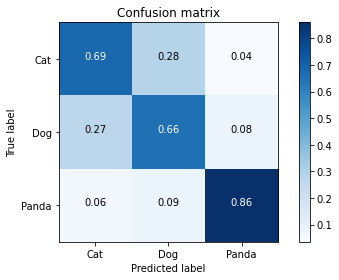

In [139]:
cnf_matrix = confusion_matrix(y_test_labeled, y_pred_labeled, labels=classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix',normalize=True)

In [34]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 49, 49, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 47, 47, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [35]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 256
layer_0_filters: 16
layer_1_filters: 16
layer_2_filters: 64
Score: 0.7333333492279053
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 1024
layer_0_filters: 64
layer_1_filters: 64
Score: 0.7200000286102295
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 256
layer_0_filters: 16
layer_1_filters: 32
layer_2_filters: 64
Score: 0.7200000286102295
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 256
layer_0_filters: 32
Score: 0.7183333039283752
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 512
layer_0_filters: 16
layer_1_filters: 16
layer_2_filters: 16
Score: 0.7183333039283752
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 128
layer_0_filters: 32
Score: 0.7166666388511658
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 64
layer_0_filters: 64
layer_

Try to Predict :

In [78]:
predict_path = '/content/drive/MyDrive/cing.jpg'

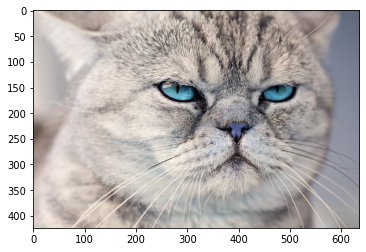

In [79]:
img=cv2.imread(predict_path,1)
plt.imshow(img)
plt.show()

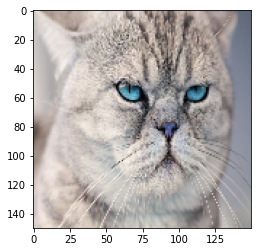

In [80]:
new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_img)
plt.show()

In [81]:
X_pred = np.array(new_img).reshape(-1, IMG_SIZE,IMG_SIZE,3)
X_pred = X_pred/255.0

In [82]:
result = best_model.predict(X_pred)
print(result)

predicted_value = np.argmax(result)
print(predicted_value)
if predicted_value == 0:
  print('Cat')
elif predicted_value == 1:
  print('Dog')
else:
  print('Panda')

[[0.5343372  0.45633104 0.0093317 ]]
0
Cat
